In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, variables].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

In [3]:
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)

In [4]:
explained_variance = pca.explained_variance_ratio_

In [5]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','target']

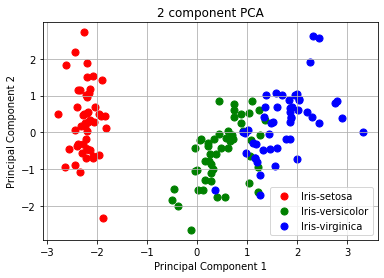

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()